### Lets draw a decision tree using the GINI impurity as a criteria for branching:

#### Import the necessary libraries: 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Import the dataset
df= pd.read_csv('car_evaluation.csv',header=None)
#note here that there are no column names: so set, header = None, otherwise it
#will treat the first entry row as the columns.
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
#lets see the shape of our data
df.shape

(1728, 7)

In [4]:
#lets allocate the names to our columns:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns=column_names

In [5]:
#lets view our columns that we have just named:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
#lets see how the values are distributed inside each feature:
for col in column_names:
    print(df[col].value_counts()) 


med      432
high     432
vhigh    432
low      432
Name: buying, dtype: int64
med      432
high     432
vhigh    432
low      432
Name: maint, dtype: int64
3        432
2        432
4        432
5more    432
Name: doors, dtype: int64
more    576
2       576
4       576
Name: persons, dtype: int64
med      576
big      576
small    576
Name: lug_boot, dtype: int64
med     576
high    576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [7]:
#we have already been given that there are no missing values in the attributes, but just in case: 
df.isnull().sum()


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [8]:
#allocating the predictors:
X = df.iloc[:,:-1]

#allocating the predicted variable:
Y = df.iloc[:,6]

In [9]:
#lets distribute our data into train and test split:
from sklearn.model_selection import train_test_split

#the test set has a size of 20% of the dataset if we set the test_size=0.2, and setting the random_state ensures that we get the same split:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

### Our data is in non-numerical format and for doing that we need to encode them using any of the encoders given so that the data can be efficiently processed using python.:

In [10]:
#pip install category_encoders

In [11]:
import category_encoders as ce

In [12]:
#we know that our data is categorical(and ordinal) in nature , so we can use the ordinalencoder here for transforming the data:
en = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [13]:
#lets fit and transform our data:
xtrain = en.fit_transform(xtrain)
xtest = en.fit_transform(xtest)

In [26]:
xtrain.dtypes
#we can see that the data has been converted into integer format.

buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
dtype: object

In [15]:
xtest.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


# lets train our model and see how well it fits:
Note that there are multiple criteria to implement the decision tree and we have selected to proceed with the gini index. The other measure could have been entropy, but for now we are going ahead with the gini index.

In [27]:
from sklearn.tree import DecisionTreeClassifier 
gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [28]:
# fit the model
gini.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [29]:
ypred=gini.predict(xtest)

In [30]:
from sklearn.metrics import accuracy_score


In [31]:
print('model accuracy is :')
print(accuracy_score(ytest,ypred))

model accuracy is :
0.8179190751445087


In [32]:
#training set accuracy was:
y_pred_train=gini.predict(xtrain)


print('training set accuracy is :')
print(accuracy_score(ytrain,y_pred_train))

training set accuracy is :
0.8024602026049205


## The similarity in the scores obtained is a clear indication that there is no overfitting in the model.

In [22]:
#Lets try to visualize our results:
from sklearn import tree

[Text(223.20000000000002, 190.26, 'X[5] <= 2.5\ngini = 0.452\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(167.4, 135.9, 'X[3] <= 2.5\ngini = 0.577\nsamples = 913\nvalue = [301, 58, 506, 48]'),
 Text(111.60000000000001, 81.53999999999999, 'X[1] <= 1.5\ngini = 0.631\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.462\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(167.4, 27.180000000000007, 'gini = 0.634\nsamples = 466\nvalue = [247, 58, 113, 48]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 298\nvalue = [0, 0, 298, 0]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 469\nvalue = [0, 0, 469, 0]')]

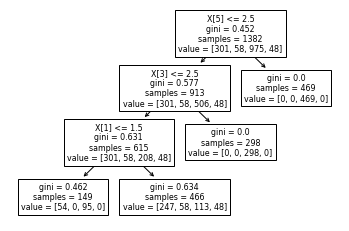

In [33]:
tree.plot_tree(gini.fit(xtrain,ytrain))

Lets describe the above decision tree . Now as these values are encoded and are in numerical format, we use the following method to draw a decision tree:
1. Sort the values from smallest to largest
2. Calculate the adjacent weights to the boundaries . eg(1,2,3,4) will have the averages : (1.5,2.5,3.5)
3. Calculate the gini values for all the boundaries and select the one that is the lowest.

In [35]:
#the rows represent the instances of the class that has been predicted (by the algorithm that we used) 
#and the columns represents the instances on the known true values.

#the values along the diagonal top-left to the bottom right are the values that have been rightly classified.
#the 4*4 matrix means that there are 4 distinct values in the predicted variable.

from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[ 65,   0,  18,   0],
       [ 11,   0,   0,   0],
       [ 17,   0, 218,   0],
       [ 17,   0,   0,   0]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         acc       0.59      0.78      0.67        83
        good       0.00      0.00      0.00        11
       unacc       0.92      0.93      0.93       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.82       346
   macro avg       0.38      0.43      0.40       346
weighted avg       0.77      0.82      0.79       346

